# load packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
import torch

from scGES import scGES_API
from scGES import metric

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2"
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
os.environ['R_HOME'] = '/home/dszspur/.conda/envs/py38/lib/R'

# load datasets

The Pancreas dataset is available in [here](https://doi.org/10.6084/m9.figshare.12420968.v7).

In [2]:
adata = sc.read("./human_pancreas_norm_complexBatch.h5ad", cache=True)
adata.obs['cell_type'] = adata.obs['celltype']
adata.obs['study'] = adata.obs['tech']

print(adata.obs['study'].unique()) 

['celseq', 'celseq2', 'fluidigmc1', 'smartseq2', 'inDrop1', 'inDrop2', 'inDrop3', 'inDrop4', 'smarter']
Categories (9, object): ['celseq', 'celseq2', 'fluidigmc1', 'inDrop1', ..., 'inDrop3', 'inDrop4', 'smarter', 'smartseq2']


# scGESI

In [3]:
scges = scGES_API(adata.copy(), tech_key='study', query_name=None,celltype_key = 'cell_type', batch_size = 64,
                  train_params={'num_epochs': 5, 'lr': 0.001},device = device, 
                  mode_save_dir='methods_weight/pancreas')

scges.train_atlas(model_type = 'HVG',train_params = {'num_epochs': 10, 'lr': 0.001,'weight':[1, 5, 1]})  
scges.train_atlas(model_type = 'LVG',train_params = {'num_epochs': 10, 'lr': 0.001, 'weight':[1,1], 'each_epochs': [1,1]}) 

... data preprocess ...


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.84s/it]


Model weights have been saved.
Loaded pre-trained weights for pretrain_model from methods_results/scGES/pancreas/pretrain_model.pth.
...  ATLAS HVG train ...
label dict 16382
all labels are known with atlas
cells for train: 16382


 10%|████████▍                                                                           | 1/10 [00:09<01:28,  9.83s/it]

atlas_model_HVG - Epoch [1/10], Tatol Loss: 603.1086


 20%|████████████████▊                                                                   | 2/10 [00:18<01:13,  9.20s/it]

atlas_model_HVG - Epoch [2/10], Tatol Loss: 563.3290


 30%|█████████████████████████▏                                                          | 3/10 [00:29<01:10, 10.02s/it]

atlas_model_HVG - Epoch [3/10], Tatol Loss: 547.9180


 40%|█████████████████████████████████▌                                                  | 4/10 [00:40<01:02, 10.39s/it]

atlas_model_HVG - Epoch [4/10], Tatol Loss: 536.9979


 50%|██████████████████████████████████████████                                          | 5/10 [00:51<00:53, 10.61s/it]

atlas_model_HVG - Epoch [5/10], Tatol Loss: 529.3769


 60%|██████████████████████████████████████████████████▍                                 | 6/10 [01:01<00:42, 10.53s/it]

atlas_model_HVG - Epoch [6/10], Tatol Loss: 523.1540


 70%|██████████████████████████████████████████████████████████▊                         | 7/10 [01:16<00:35, 11.94s/it]

atlas_model_HVG - Epoch [7/10], Tatol Loss: 517.3530


 80%|███████████████████████████████████████████████████████████████████▏                | 8/10 [01:34<00:27, 13.74s/it]

atlas_model_HVG - Epoch [8/10], Tatol Loss: 511.7988


 90%|███████████████████████████████████████████████████████████████████████████▌        | 9/10 [01:52<00:14, 14.99s/it]

atlas_model_HVG - Epoch [9/10], Tatol Loss: 508.4334


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [02:10<00:00, 13.00s/it]

atlas_model_HVG - Epoch [10/10], Tatol Loss: 505.0935
Model weights have been saved.
Loaded pre-trained weights for atlas_model_HVG from methods_results/scGES/pancreas/atlas_model_HVG.pth.


...  atlas LVG train ...


 10%|████████▍                                                                           | 1/10 [00:20<03:06, 20.77s/it]

atlas_model_LVG - Epoch [1/10], Reconstruction Loss: 0.9185, Classification Loss: 1.9610


 20%|████████████████▊                                                                   | 2/10 [00:41<02:47, 20.91s/it]

atlas_model_LVG - Epoch [2/10], Reconstruction Loss: 0.7348, Classification Loss: 1.9499


 30%|█████████████████████████▏                                                          | 3/10 [01:03<02:29, 21.38s/it]

atlas_model_LVG - Epoch [3/10], Reconstruction Loss: 0.8776, Classification Loss: 1.9546


 40%|█████████████████████████████████▌                                                  | 4/10 [01:25<02:08, 21.38s/it]

atlas_model_LVG - Epoch [4/10], Reconstruction Loss: 1.0260, Classification Loss: 1.9499


 50%|██████████████████████████████████████████                                          | 5/10 [01:46<01:47, 21.52s/it]

atlas_model_LVG - Epoch [5/10], Reconstruction Loss: 0.7223, Classification Loss: 1.9472


 60%|██████████████████████████████████████████████████▍                                 | 6/10 [02:06<01:23, 20.88s/it]

atlas_model_LVG - Epoch [6/10], Reconstruction Loss: 0.6804, Classification Loss: 1.9470


 70%|██████████████████████████████████████████████████████████▊                         | 7/10 [02:26<01:01, 20.60s/it]

atlas_model_LVG - Epoch [7/10], Reconstruction Loss: 0.7532, Classification Loss: 1.9470


 80%|███████████████████████████████████████████████████████████████████▏                | 8/10 [02:49<00:42, 21.39s/it]

atlas_model_LVG - Epoch [8/10], Reconstruction Loss: 0.7184, Classification Loss: 1.9474


 90%|███████████████████████████████████████████████████████████████████████████▌        | 9/10 [03:11<00:21, 21.48s/it]

atlas_model_LVG - Epoch [9/10], Reconstruction Loss: 0.7237, Classification Loss: 1.9473


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [03:32<00:00, 21.28s/it]

atlas_model_LVG - Epoch [10/10], Reconstruction Loss: 0.8743, Classification Loss: 1.9470
Model weights have been saved.
Loaded pre-trained weights for atlas_model_LVG from methods_results/scGES/pancreas/atlas_model_LVG.pth.


# Integration Results of scGESI

In [4]:
import matplotlib.pyplot as plt
from anndata import AnnData
from copy import deepcopy

adata_results = scges.atlas.copy()

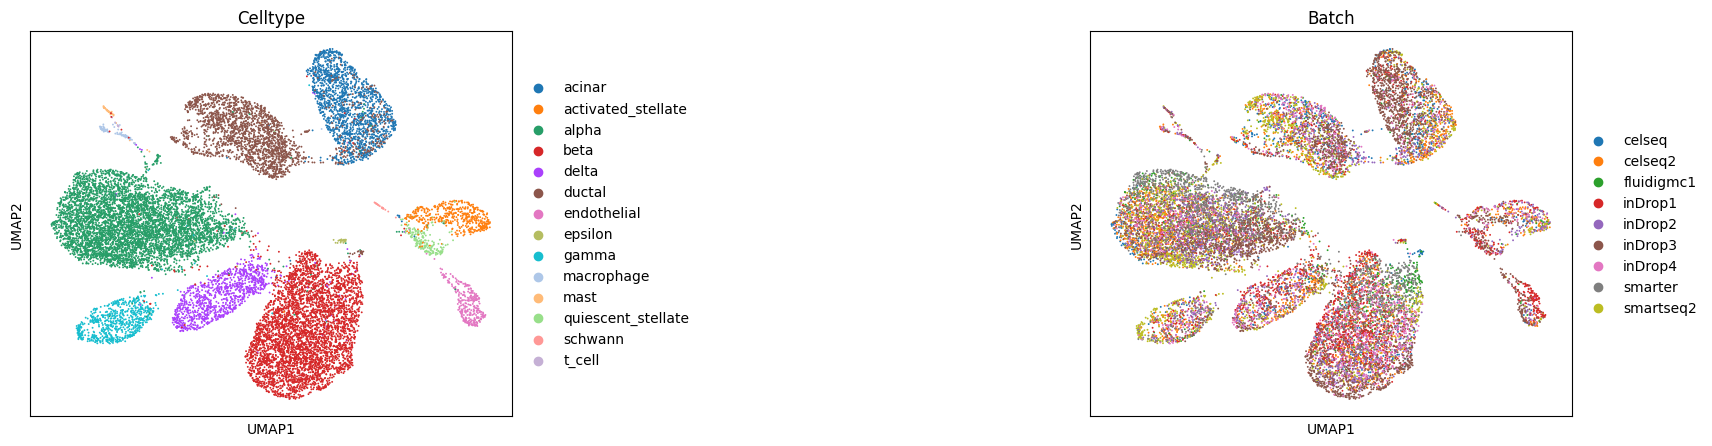

In [5]:
temporary_HVG = AnnData(deepcopy(adata_results.obsm['atlas HVG denoised']))
temporary_HVG.obs = adata_results.obs

sc.pp.normalize_total(temporary_HVG)
sc.pp.log1p(temporary_HVG, copy=False)
sc.pp.scale(temporary_HVG)
sc.tl.pca(temporary_HVG, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_HVG, n_neighbors = 15)
sc.tl.umap(temporary_HVG)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_HVG, color = ["celltype",  "study"],  title = ['Celltype',  'Batch'], wspace=1,  ncols=2)

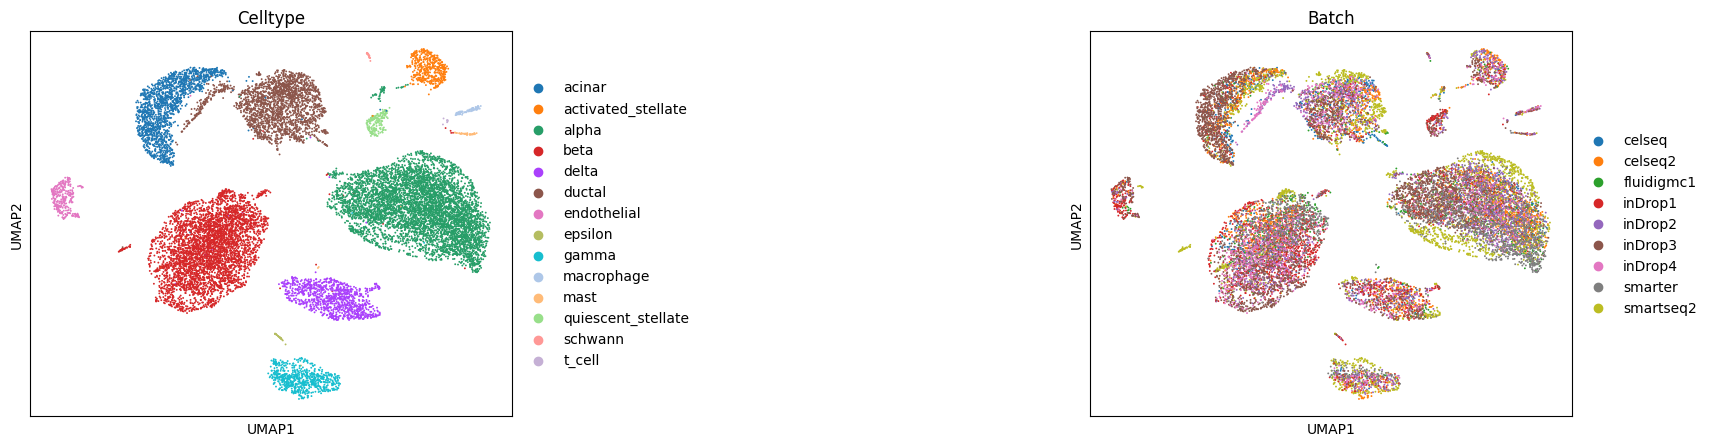

In [6]:
temporary_LVG = AnnData(deepcopy(adata_results.obsm['atlas LVG denoised']))
temporary_LVG.obs = adata_results.obs

sc.pp.normalize_total(temporary_LVG)
sc.pp.log1p(temporary_LVG, copy=False)
sc.pp.scale(temporary_LVG)
sc.tl.pca(temporary_LVG, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_LVG, n_neighbors = 15)
sc.tl.umap(temporary_LVG)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_LVG, color = ["celltype",  "study"], title = ['Celltype',  'Batch'], wspace=1, ncols=2)

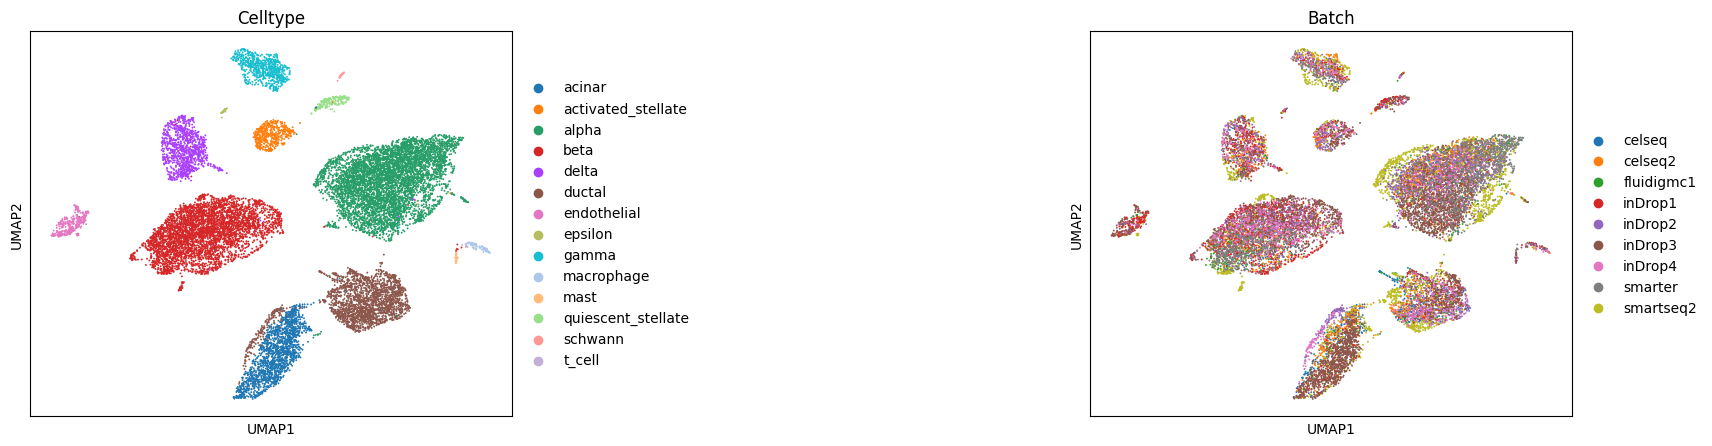

In [7]:
temporary_ALL = AnnData(deepcopy(np.concatenate((adata_results.obsm["atlas HVG denoised"], adata_results.obsm["atlas LVG denoised"]), axis=1)))
temporary_ALL.obs = adata_results.obs

sc.pp.normalize_total(temporary_ALL)
sc.pp.log1p(temporary_ALL, copy=False)
sc.pp.scale(temporary_ALL)
sc.tl.pca(temporary_ALL, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_ALL, n_neighbors = 15)
sc.tl.umap(temporary_ALL)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_ALL, color = ["celltype",  "study"], title = ['Celltype',  'Batch'], wspace=1, ncols=2)

# scGESM

In [8]:
adata

AnnData object with n_obs × n_vars = 16382 × 19093
    obs: 'tech', 'celltype', 'size_factors', 'cell_type', 'study'
    layers: 'counts'

In [9]:
query_tech = 'celseq'
scges = scGES_API(adata.copy(), tech_key='study', query_name= query_tech,celltype_key = 'cell_type', batch_size = 64,
                  train_params={'num_epochs': 5, 'lr': 0.001},device = device, 
                  mode_save_dir='methods_results/scGESM/pbmc')

scges.train_atlas(model_type = 'HVG',train_params = {'num_epochs': 10, 'lr': 0.001,'weight':[1,5,1]})  
scges.train_map(model_type = 'HVG',train_params = {'num_epochs': 5, 'lr': 0.001, 'weight':[1,1]}) 

scges.train_atlas(model_type = 'LVG',train_params = {'num_epochs': 10, 'lr': 0.001, 'weight':[1,1], 'each_epochs': [1,1]})  
scges.train_map(model_type = 'LVG',train_params = {'num_epochs': 5, 'lr': 0.001,'weight':[1,1], 'each_epochs': [1,1]}) 

... data preprocess ...


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.86s/it]


Model weights have been saved.
Loaded pre-trained weights for pretrain_model from methods_results/scGESM/pbmc/pretrain_model.pth.
Loaded pre-trained weights for pretrain_model from methods_results/scGESM/pbmc/pretrain_model.pth.
...  ATLAS HVG train ...
label dict 15378
all labels are known with atlas
cells for train: 15378


 10%|████████▍                                                                           | 1/10 [00:17<02:37, 17.49s/it]

atlas_model_HVG - Epoch [1/10], Tatol Loss: 484.2069


 20%|████████████████▊                                                                   | 2/10 [00:33<02:14, 16.76s/it]

atlas_model_HVG - Epoch [2/10], Tatol Loss: 452.5370


 30%|█████████████████████████▏                                                          | 3/10 [00:54<02:09, 18.52s/it]

atlas_model_HVG - Epoch [3/10], Tatol Loss: 440.6571


 40%|█████████████████████████████████▌                                                  | 4/10 [01:13<01:52, 18.74s/it]

atlas_model_HVG - Epoch [4/10], Tatol Loss: 435.0380


 50%|██████████████████████████████████████████                                          | 5/10 [01:36<01:41, 20.27s/it]

atlas_model_HVG - Epoch [5/10], Tatol Loss: 426.9106


 60%|██████████████████████████████████████████████████▍                                 | 6/10 [01:53<01:16, 19.21s/it]

atlas_model_HVG - Epoch [6/10], Tatol Loss: 419.0207


 70%|██████████████████████████████████████████████████████████▊                         | 7/10 [02:05<00:50, 16.90s/it]

atlas_model_HVG - Epoch [7/10], Tatol Loss: 413.7409


 80%|███████████████████████████████████████████████████████████████████▏                | 8/10 [02:17<00:30, 15.24s/it]

atlas_model_HVG - Epoch [8/10], Tatol Loss: 410.0870


 90%|███████████████████████████████████████████████████████████████████████████▌        | 9/10 [02:29<00:14, 14.23s/it]

atlas_model_HVG - Epoch [9/10], Tatol Loss: 408.3263


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [02:44<00:00, 16.48s/it]

atlas_model_HVG - Epoch [10/10], Tatol Loss: 406.8950
Model weights have been saved.
Loaded pre-trained weights for atlas_model_HVG from methods_results/scGESM/pbmc/atlas_model_HVG.pth.


...  MAP HVG train ...
mnns and knns of mapping
mnn dict 1004
cells for train: 1004
Loaded pre-trained weights for atlas_model_HVG from methods_results/scGESM/pbmc/atlas_model_HVG.pth.
Fixed weight completion!


 20%|█████████████████                                                                    | 1/5 [00:00<00:03,  1.18it/s]

map_model_HVG - Epoch [1/5], Tatol Loss: 1416.7111


 40%|██████████████████████████████████                                                   | 2/5 [00:01<00:02,  1.25it/s]

map_model_HVG - Epoch [2/5], Tatol Loss: 1398.4250


 60%|███████████████████████████████████████████████████                                  | 3/5 [00:02<00:01,  1.29it/s]

map_model_HVG - Epoch [3/5], Tatol Loss: 1381.5917


 80%|████████████████████████████████████████████████████████████████████                 | 4/5 [00:03<00:00,  1.28it/s]

map_model_HVG - Epoch [4/5], Tatol Loss: 1366.3015


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.28it/s]

map_model_HVG - Epoch [5/5], Tatol Loss: 1351.8335
Model weights have been saved.
Loaded pre-trained weights for map_model_HVG from methods_results/scGESM/pbmc/map_model_HVG.pth.
Loaded pre-trained weights for atlas_model_HVG from methods_results/scGESM/pbmc/atlas_model_HVG.pth.


...  atlas LVG train ...


 10%|████████▍                                                                           | 1/10 [00:15<02:23, 16.00s/it]

atlas_model_LVG - Epoch [1/10], Reconstruction Loss: 1.3152, Classification Loss: 2.0366


 20%|████████████████▊                                                                   | 2/10 [00:29<01:56, 14.58s/it]

atlas_model_LVG - Epoch [2/10], Reconstruction Loss: 0.4719, Classification Loss: 1.9486


 30%|█████████████████████████▏                                                          | 3/10 [00:45<01:46, 15.22s/it]

atlas_model_LVG - Epoch [3/10], Reconstruction Loss: 1.1617, Classification Loss: 1.9477


 40%|█████████████████████████████████▌                                                  | 4/10 [01:00<01:31, 15.17s/it]

atlas_model_LVG - Epoch [4/10], Reconstruction Loss: 0.7769, Classification Loss: 1.9478


 50%|██████████████████████████████████████████                                          | 5/10 [01:13<01:11, 14.25s/it]

atlas_model_LVG - Epoch [5/10], Reconstruction Loss: 1.0535, Classification Loss: 1.9890


 60%|██████████████████████████████████████████████████▍                                 | 6/10 [01:27<00:57, 14.31s/it]

atlas_model_LVG - Epoch [6/10], Reconstruction Loss: 1.2159, Classification Loss: 1.9469


 70%|██████████████████████████████████████████████████████████▊                         | 7/10 [01:42<00:43, 14.52s/it]

atlas_model_LVG - Epoch [7/10], Reconstruction Loss: 0.7173, Classification Loss: 1.9470


 80%|███████████████████████████████████████████████████████████████████▏                | 8/10 [01:55<00:27, 13.86s/it]

atlas_model_LVG - Epoch [8/10], Reconstruction Loss: 0.8153, Classification Loss: 1.9469


 90%|███████████████████████████████████████████████████████████████████████████▌        | 9/10 [02:07<00:13, 13.27s/it]

atlas_model_LVG - Epoch [9/10], Reconstruction Loss: 0.6232, Classification Loss: 1.9467


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [02:26<00:00, 14.65s/it]

atlas_model_LVG - Epoch [10/10], Reconstruction Loss: 0.8403, Classification Loss: 1.9471
Model weights have been saved.
Loaded pre-trained weights for atlas_model_LVG from methods_results/scGESM/pbmc/atlas_model_LVG.pth.


... map LVG train ...
Loaded pre-trained weights for atlas_model_LVG from methods_results/scGESM/pbmc/atlas_model_LVG.pth.


 20%|█████████████████                                                                    | 1/5 [00:18<01:14, 18.73s/it]

map_model_LVG - Epoch [1/5], Reconstruction Loss: 0.9511, Classification Loss: 2.0132


 40%|██████████████████████████████████                                                   | 2/5 [00:32<00:47, 15.73s/it]

map_model_LVG - Epoch [2/5], Reconstruction Loss: 0.7965, Classification Loss: 2.0001


 60%|███████████████████████████████████████████████████                                  | 3/5 [00:45<00:29, 14.52s/it]

map_model_LVG - Epoch [3/5], Reconstruction Loss: 0.9857, Classification Loss: 2.0054


 80%|████████████████████████████████████████████████████████████████████                 | 4/5 [00:59<00:14, 14.33s/it]

map_model_LVG - Epoch [4/5], Reconstruction Loss: 0.7299, Classification Loss: 2.0257


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:12<00:00, 14.57s/it]

map_model_LVG - Epoch [5/5], Reconstruction Loss: 0.8947, Classification Loss: 1.9638
Model weights have been saved.
Loaded pre-trained weights for map_model_LVG from methods_results/scGESM/pbmc/map_model_LVG.pth.
Loaded pre-trained weights for atlas_model_LVG from methods_results/scGESM/pbmc/atlas_model_LVG.pth.


# Mapping Results of scGESM

In [10]:
adata_map = scges.adatamap.copy()

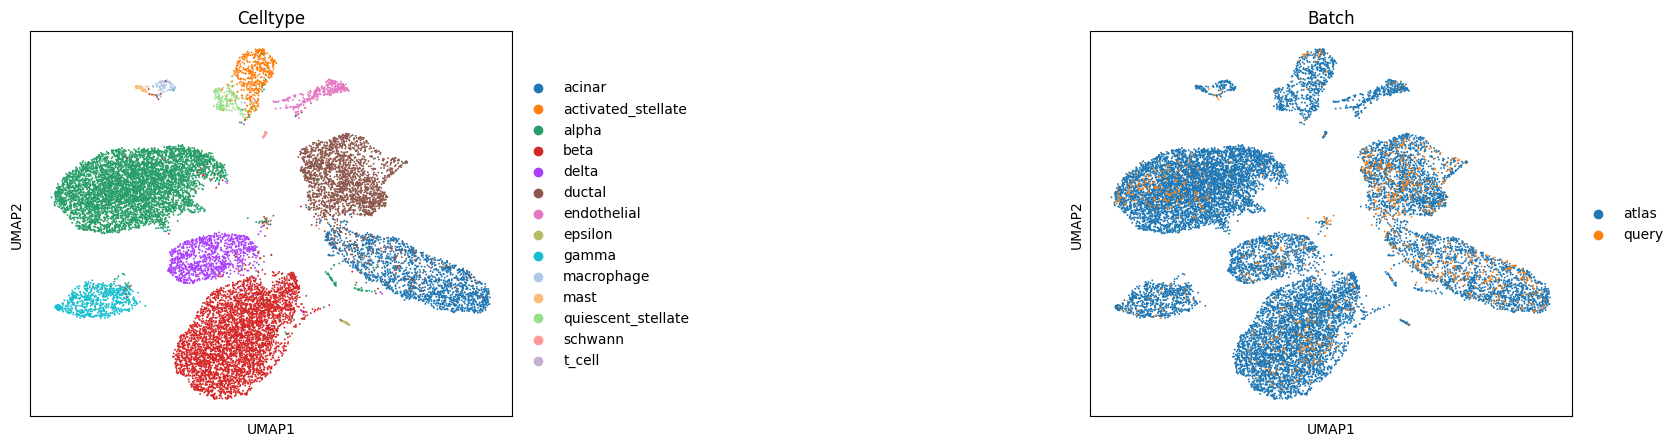

In [11]:
temporary_HVG = AnnData(deepcopy(adata_map.obsm['map HVG denoised']))
temporary_HVG.obs = adata_map.obs

sc.pp.normalize_total(temporary_HVG)
sc.pp.log1p(temporary_HVG, copy=False)
sc.pp.scale(temporary_HVG)
sc.tl.pca(temporary_HVG, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_HVG, n_neighbors = 15)
sc.tl.umap(temporary_HVG)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_HVG, color = ["celltype",  "batch"], title = ['Celltype',  'Batch'], wspace=1,  ncols=2)

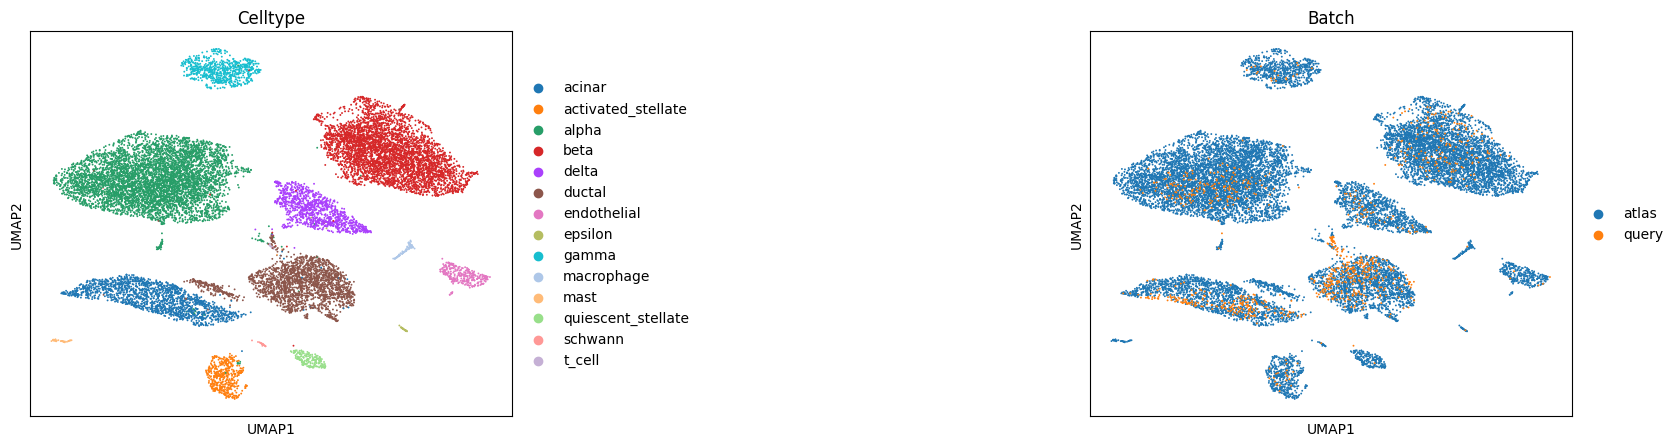

In [12]:
temporary_LVG = AnnData(deepcopy(adata_map.obsm['map LVG denoised']))
temporary_LVG.obs = adata_map.obs

sc.pp.normalize_total(temporary_LVG)
sc.pp.log1p(temporary_LVG, copy=False)
sc.pp.scale(temporary_LVG)
sc.tl.pca(temporary_LVG, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_LVG, n_neighbors = 15)
sc.tl.umap(temporary_LVG)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_LVG, color = ["celltype",  "batch"], title = ['Celltype',  'Batch'], wspace=1, ncols=2)

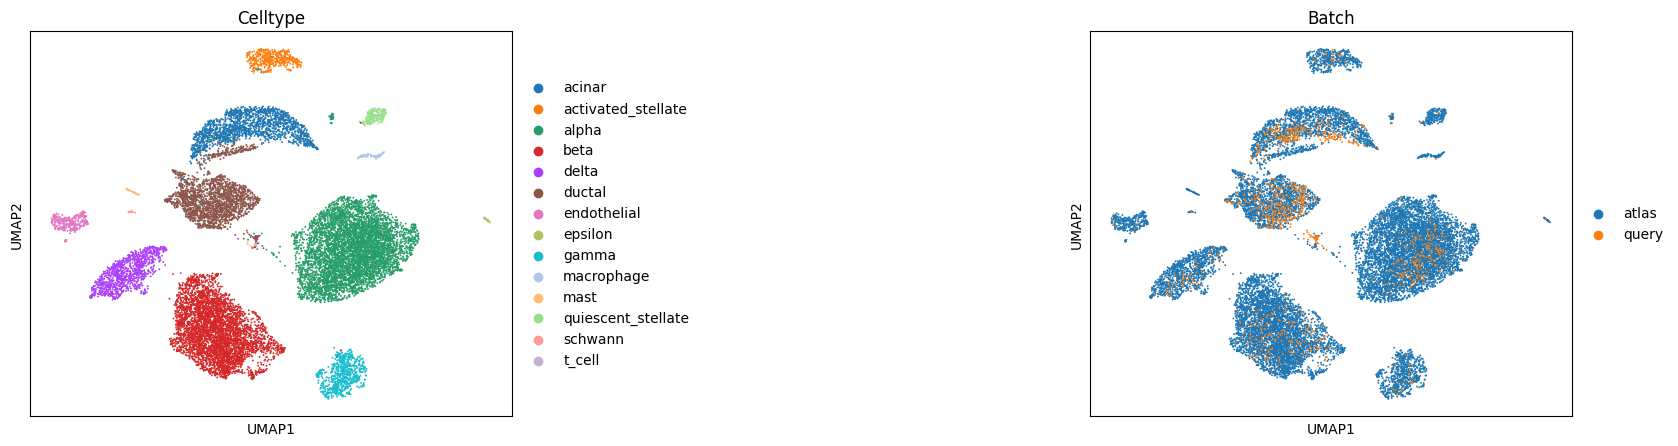

In [13]:
temporary_ALL = AnnData(deepcopy(np.concatenate((adata_map.obsm["map HVG denoised"], adata_map.obsm["map LVG denoised"]), axis=1)))
temporary_ALL.obs = adata_map.obs

sc.pp.normalize_total(temporary_ALL)
sc.pp.log1p(temporary_ALL, copy=False)
sc.pp.scale(temporary_ALL)
sc.tl.pca(temporary_ALL, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_ALL, n_neighbors = 15)
sc.tl.umap(temporary_ALL)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_ALL, color = ["celltype",  "batch"], title = ['Celltype',  'Batch'], wspace=1, ncols=2)

# Label Transfer

In [14]:
import numpy as np
import pandas as pd
from collections import Counter
import scanpy as sc
from collections import Counter
from sklearn.neighbors import NearestNeighbors
from scGES import metric

In [15]:
temporary_HVG.obsm['HVG denoised pca'] = temporary_HVG.obsm['X_pca']
temporary_HVG.obsm['LVG denoised pca'] = temporary_LVG.obsm['X_pca']
temporary_HVG.obsm['ALL denoised pca'] = temporary_ALL.obsm['X_pca']

In [16]:
temporary_HVG

AnnData object with n_obs × n_vars = 16382 × 2000
    obs: 'tech', 'celltype', 'size_factors', 'cell_type', 'study', 'study_label', 'renewed atlas', 'batch', 'map_labels', 'map_HVG_labels', 'map_LVG_labels'
    var: 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'celltype_colors', 'batch_colors'
    obsm: 'X_pca', 'X_umap', 'HVG denoised pca', 'LVG denoised pca', 'ALL denoised pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [17]:
adata_ref = temporary_HVG[temporary_HVG.obs['batch'] != 'query']
adata_query = temporary_HVG[temporary_HVG.obs['batch'] == 'query']

In [18]:
# First
adata_query.obs['predictions'] = metric.Label_transfer(adata_query, adata_ref, n_neighbors=20, emb_key = 'HVG denoised pca', ref_label_key = 'celltype')
index = np.where(adata_query.obs['predictions'] == 0)[0].tolist() 

# Second
if len(index) >1:
    label = metric.Label_transfer(adata_query, n_neighbors=30,  index = index, emb_key = 'HVG denoised pca', ref_label_key = 'celltype')
adata_query.obs.loc[adata_query.obs.index[index], 'predictions'] = label

In [19]:
R = metric.Metric_label(adata_query.obs['celltype'], adata_query.obs['predictions'])
print(R['MedF1'])
print(R['Acc'])

0.9631236442516269
0.9641434262948207
